# LIBRARIES

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import r2_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score,classification_report,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data

In [2]:
df=pd.read_csv('data.csv')
Loan_ID=df['Loan_ID']
df = df.drop('Loan_ID', axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,3772,833.0,57.0,360.0,NaN,Semiurban,NaN
1,Female,No,0,Graduate,No,2500,0.0,67.0,360.0,1.0,Urban,Y
2,Male,Yes,3+,Graduate,Yes,5677,1424.0,100.0,360.0,1.0,Rural,Y
3,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
4,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             957 non-null    object 
 1   Married            978 non-null    object 
 2   Dependents         956 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      926 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         954 non-null    float64
 8   Loan_Amount_Term   961 non-null    float64
 9   Credit_History     902 non-null    float64
 10  Property_Area      981 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 92.1+ KB


In [4]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      752
CoapplicantIncome    437
LoanAmount           232
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# Handling Missing Values

In [5]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
#Filling null values in 'Gender' with the the most occuring value(mode) i.e. Male

df['Married']=df['Married'].fillna(df['Married'].mode()[0])
#Filling null values in 'Married' with the the most occuring value(mode)

df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
#Filling null values in 'Dependents' with the the most occuring value(mode)

df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)
#Replacing all the rows with '3+' dependents to '3' to convert the column to a numerical column (0,1,2,3+ were the unique values)

df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
#Filling null values in 'Gender' with the the most occuring value(mode)

df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
#Filling null values in 'LoanAmount' with the the middle most value(median)

In [6]:
print(df['Loan_Amount_Term'].value_counts()) #Checking 'Loan_Amount_Term' distribution

Loan_Amount_Term
360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: count, dtype: int64


In [7]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
#Filling null values in 'Loan_Amount_Term' with the the most occuring value(mode) as people with 360 month term are highly dominant
#and it won't affect the distribution much

df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(int)
#Converting float to int


In [8]:
print(df['Credit_History'].value_counts()) #Checking distribution of 'Credit_History'

Credit_History
1.0    754
0.0    148
Name: count, dtype: int64


In [9]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
#Filling null values in 'Credit_History' with the the most occuring value(mode) i.e. 1

df['Credit_History'] = df['Credit_History'].astype(int)
#Converting float to int

I checked that 'Credit_History' had 0.54 correlation(good enough) with the output factor 'Loan_Status'. 
Filling the column with mode value may distort the prediction very much in model.
I thought of doing Predictive Imputation to fill the values.
But, the column 'Credit_History' also had less correlation with all other features, so Predictive Imputation didn't vary much from mode fill.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    object 
 1   Married            981 non-null    object 
 2   Dependents         981 non-null    int64  
 3   Education          981 non-null    object 
 4   Self_Employed      981 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    int64  
 9   Credit_History     981 non-null    int64  
 10  Property_Area      981 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 92.1+ KB


In [11]:
# le = LabelEncoder()
df['Loan_Status'] = df['Loan_Status'].map({'N': 0, 'Y': 1})
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['Married'] = df['Married'].map({'No': 0, 'Yes': 1})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'No': 0, 'Yes': 1})
#Encoding categorical variables into numeric form

df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True)
#Encoding categorical variables into numeric form

df = pd.get_dummies(df, columns=['Loan_Amount_Term'], drop_first=True)
#Encoding categorical variables into numeric form

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,...,Loan_Amount_Term_36,Loan_Amount_Term_60,Loan_Amount_Term_84,Loan_Amount_Term_120,Loan_Amount_Term_180,Loan_Amount_Term_240,Loan_Amount_Term_300,Loan_Amount_Term_350,Loan_Amount_Term_360,Loan_Amount_Term_480
0,1,1,0,1,0,3772,833.0,57.0,1,NaN,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,1,0,2500,0.0,67.0,1,1.0,...,False,False,False,False,False,False,False,False,True,False
2,1,1,3,1,1,5677,1424.0,100.0,1,1.0,...,False,False,False,False,False,False,False,False,True,False
3,1,0,0,1,1,20166,0.0,650.0,1,1.0,...,False,False,False,False,False,False,False,False,False,True
4,1,0,0,1,0,1853,2840.0,114.0,1,0.0,...,False,False,False,False,False,False,False,False,True,False


# Checking Skewness, Normalization and Scaling

In [12]:
print(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].skew())
#Checking skewness of continuous column values

ApplicantIncome      7.086961
CoapplicantIncome    6.844109
LoanAmount           2.764493
dtype: float64


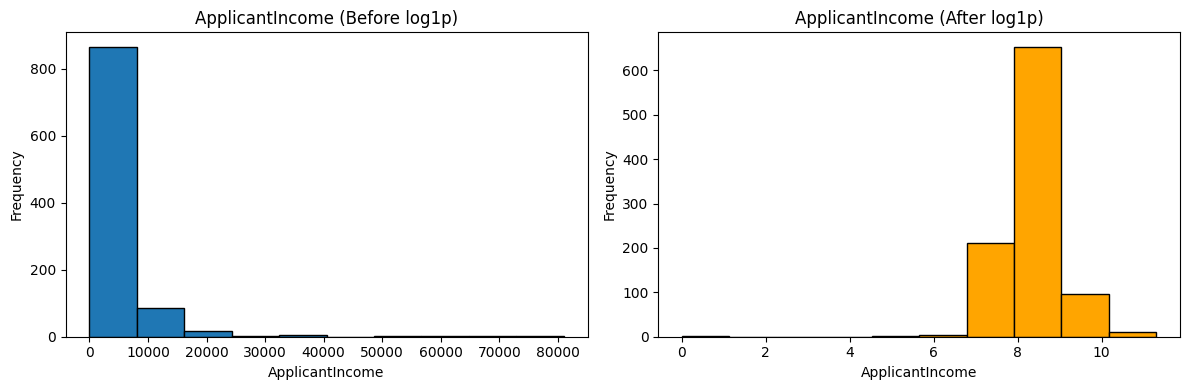

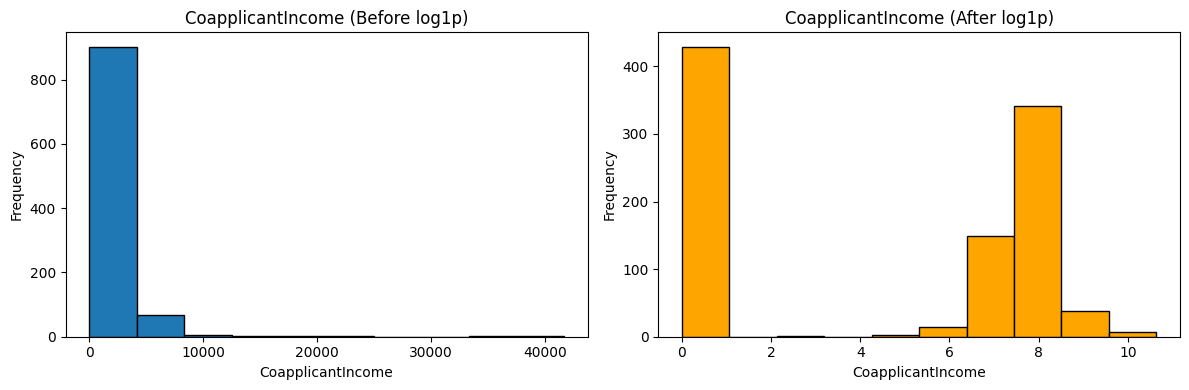

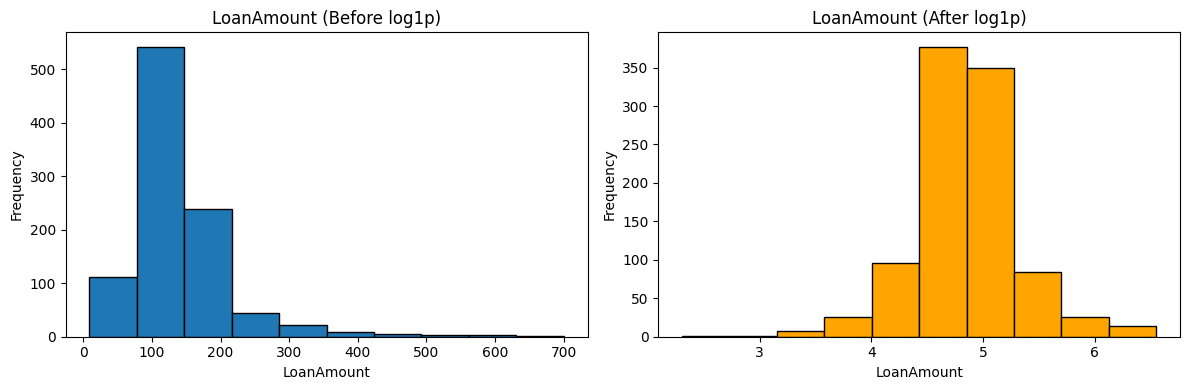

In [13]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for col in cols:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.hist(df[col], edgecolor="black")
    plt.title(f"{col} (Before log1p)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.subplot(1,2,2)
    plt.hist(np.log1p(df[col]), edgecolor="black",color='orange')
    plt.title(f"{col} (After log1p)")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

#Applying log transformation to reduce skewness

In [14]:
df['ApplicantIncome'] = np.log1p(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.log1p(df['CoapplicantIncome'])
df['LoanAmount'] = np.log1p(df['LoanAmount'])
df.head()
#Applying log transformation in actual DataFrame

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,...,Loan_Amount_Term_36,Loan_Amount_Term_60,Loan_Amount_Term_84,Loan_Amount_Term_120,Loan_Amount_Term_180,Loan_Amount_Term_240,Loan_Amount_Term_300,Loan_Amount_Term_350,Loan_Amount_Term_360,Loan_Amount_Term_480
0,1,1,0,1,0,8.235626,6.726233,4.060443,1,NaN,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,1,0,7.824446,0.000000,4.219508,1,1.0,...,False,False,False,False,False,False,False,False,True,False
2,1,1,3,1,1,8.644354,7.261927,4.615121,1,1.0,...,False,False,False,False,False,False,False,False,True,False
3,1,0,0,1,1,9.911803,0.000000,6.478510,1,1.0,...,False,False,False,False,False,False,False,False,False,True
4,1,0,0,1,0,7.525101,7.951911,4.744932,1,0.0,...,False,False,False,False,False,False,False,False,True,False


In [15]:
scaler = StandardScaler()
df[cols] = scaler.fit_transform(df[cols])
#Scaling continuous column values 

# EDA

In [16]:
print(df.describe())

           Gender     Married  Dependents   Education  Self_Employed  \
count  981.000000  981.000000  981.000000  981.000000     981.000000   
mean     0.814475    0.646279    0.767584    0.777778       0.121305   
std      0.388921    0.478368    1.030657    0.415952       0.326648   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      1.000000    0.000000    0.000000    1.000000       0.000000   
50%      1.000000    1.000000    0.000000    1.000000       0.000000   
75%      1.000000    1.000000    2.000000    1.000000       0.000000   
max      1.000000    1.000000    3.000000    1.000000       1.000000   

       ApplicantIncome  CoapplicantIncome    LoanAmount  Credit_History  \
count     9.810000e+02       9.810000e+02  9.810000e+02      981.000000   
mean      1.303748e-16       2.037106e-17  1.183333e-15        0.849134   
std       1.000510e+00       1.000510e+00  1.000510e+00        0.358101   
min      -1.159753e+01      -1.123941e+00 -5.514491

In [17]:
print(df['Loan_Status'].value_counts(normalize=True))

Loan_Status
1.0    0.687296
0.0    0.312704
Name: proportion, dtype: float64


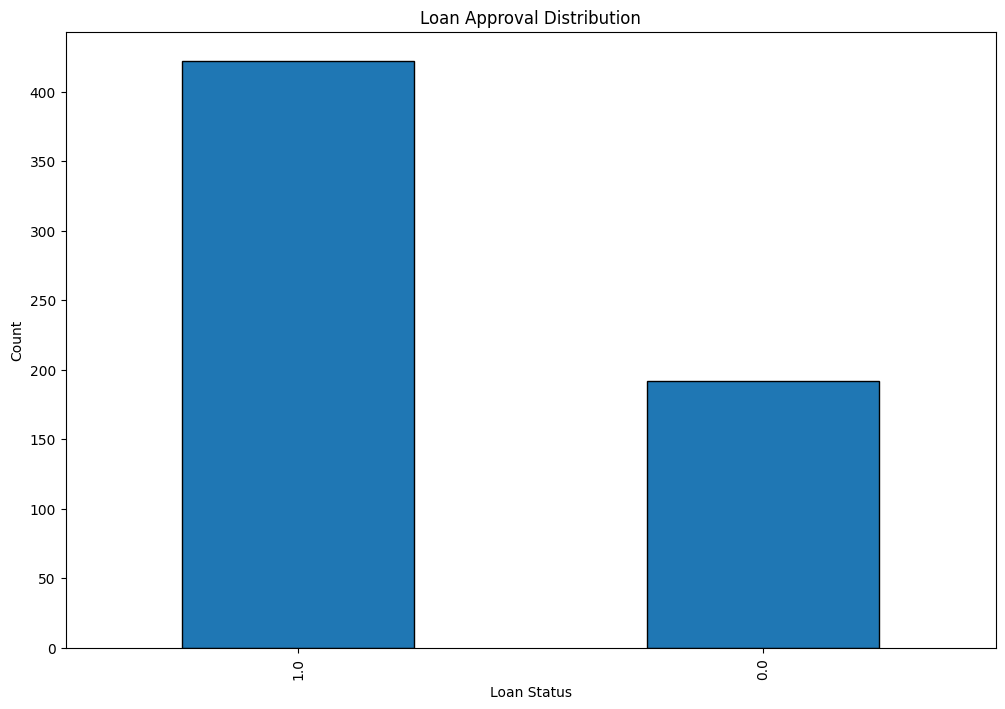

In [18]:
plt.figure(figsize=(12,8))
df['Loan_Status'].value_counts().plot(kind='bar', edgecolor='black')
plt.title("Loan Approval Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

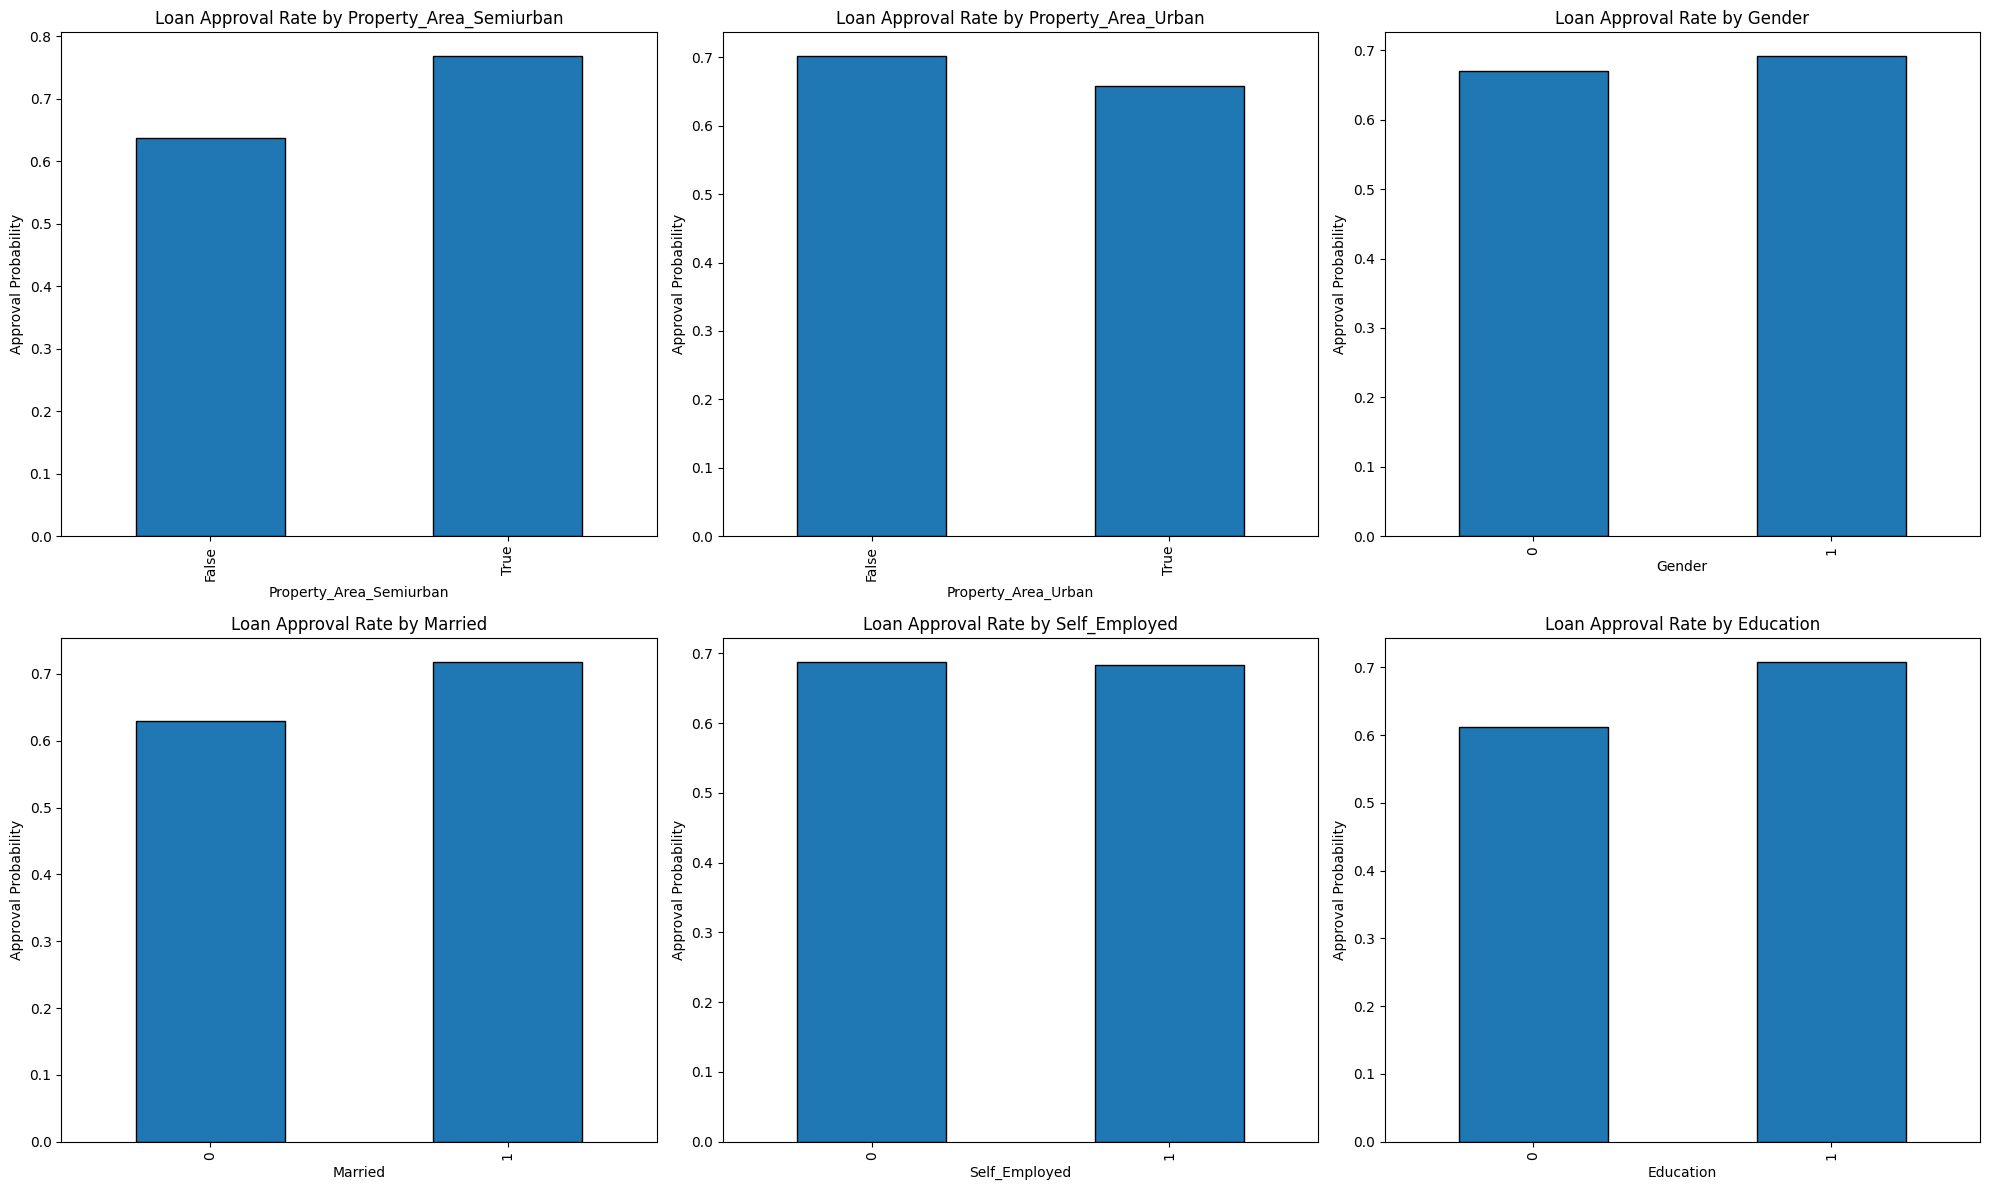

In [19]:
cat_cols = ['Property_Area_Semiurban', 'Property_Area_Urban',
            'Gender', 'Married', 'Self_Employed', 'Education']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    approval_rate = df.groupby(col)['Loan_Status'].mean()
    approval_rate.plot(kind='bar', edgecolor='black', ax=axes[i])
    axes[i].set_title(f"Loan Approval Rate by {col}")
    axes[i].set_ylabel("Approval Probability")
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

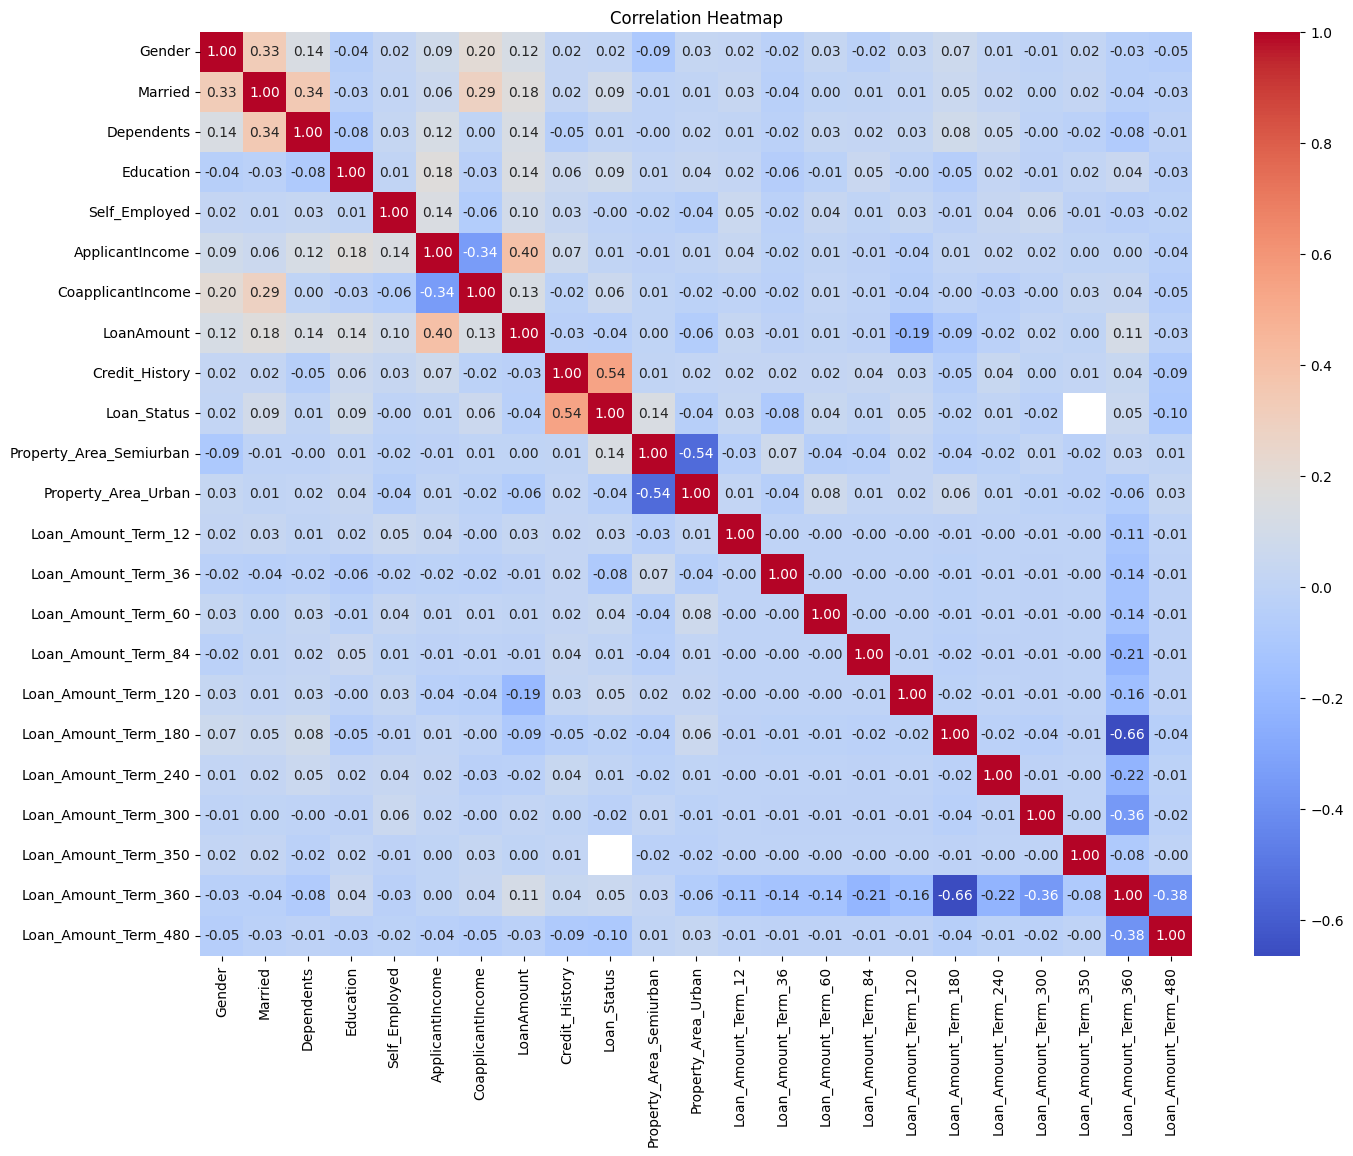

In [20]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Modelling

In [21]:
df.dropna(subset=['Loan_Status'],inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   614 non-null    int64  
 1   Married                  614 non-null    int64  
 2   Dependents               614 non-null    int64  
 3   Education                614 non-null    int64  
 4   Self_Employed            614 non-null    int64  
 5   ApplicantIncome          614 non-null    float64
 6   CoapplicantIncome        614 non-null    float64
 7   LoanAmount               614 non-null    float64
 8   Credit_History           614 non-null    int64  
 9   Loan_Status              614 non-null    float64
 10  Property_Area_Semiurban  614 non-null    bool   
 11  Property_Area_Urban      614 non-null    bool   
 12  Loan_Amount_Term_12      614 non-null    bool   
 13  Loan_Amount_Term_36      614 non-null    bool   
 14  Loan_Amount_Term_60      6

In [22]:
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42,stratify=y)
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

Training samples: 491
Test samples: 123


In [23]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

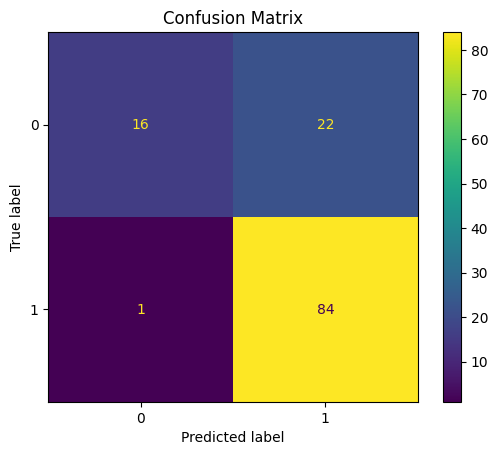

In [24]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.8130081300813008
Precision: 0.7924528301886793
Recall: 0.9882352941176471
F1 Score: 0.8795811518324608


In [26]:
X_knn = df.drop(['Loan_Status'],axis=1)
y_knn = df['Loan_Status']

In [27]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    X_knn, y_knn, test_size=0.2, random_state=42, stratify=y_knn
)

In [28]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_knn, y_train_knn)
y_pred_knn=knn_model.predict(X_test_knn)

Accuracy: 0.7560975609756098
Precision: 0.7619047619047619
Recall: 0.9411764705882353
F1 Score: 0.8421052631578947


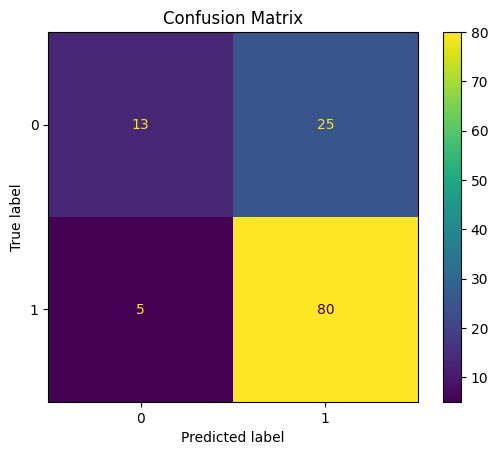

In [29]:
y_pred_knn = knn_model.predict(X_test_knn)
print("Accuracy:", accuracy_score(y_test_knn, y_pred_knn))
print("Precision:", precision_score(y_test_knn, y_pred_knn))
print("Recall:", recall_score(y_test_knn, y_pred_knn))
print("F1 Score:", f1_score(y_test_knn, y_pred_knn))
cm = confusion_matrix(y_test_knn, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [35]:
# Base learner: SVM with RBF kernel
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)

# Bagging with SVM
bagging_svm = BaggingClassifier(
    estimator=svm_clf,
    n_estimators=20,      # number of SVMs
    max_samples=0.8,      # fraction of training data per estimator
    max_features=1.0,     # use all features
    random_state=42,
    n_jobs=-1
)

# Train
bagging_svm.fit(X_train, y_train)

# Predict
y_pred = bagging_svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

ModuleNotFoundError: No module named '_posixsubprocess'